In [5]:
import numpy as np
import cv2
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import keras
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras import backend as K
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from IPython.display import display
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions
from sklearn.preprocessing import  MinMaxScaler

from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [6]:
# load dataset
def grab_image( img_path, target_size=( 60, 40 ), normMethod = 1, printAll = False ):
    img = cv2.imread( img_path, 0 )
    img = cv2.resize( img, target_size )
    img = img.astype('float')
    
    if normMethod == 1:
        img = img / 255.0
    
    elif normMethod == 2:
        img = img - 128
        img = img/128.0
    
    else:
        img = img / 255.0
    
    if printAll:
        print(img.shape)
        print(img[0,0], img[20,20])
        plt.imshow( img )
    
    img = img.flatten()
    img = np.expand_dims(img, axis=0)
    x = preprocess_input(img)
    return x

def get_training_images( n = 1294, normMethod = 1, target_size = (60,40), printAll = False ):    

    X = np.concatenate([grab_image('/home/jts7n/miscImgs/model/%d_model.png'%(i) , normMethod=normMethod, target_size=target_size, printAll = printAll) for i in range(n)])
    return X

def get_human_scores( n=0, csvLoc = '/home/jts7n/miscImgs/scores/humanScores.txt' ):
    
    hScores = pd.read_csv( csvLoc, header=None )
    
    Y = hScores[0].values
    #Y = np.expand_dims(Y, axis=0)

    
    if n == 0:
        return Y
    else:
        return Y[:n]

# split into input (X) and output (Y) variables
n = 1294
X = get_training_images( n, normMethod=2 )
print(X.shape)
y = get_human_scores( n )
print(y.shape)

(1294, 2400)
(1294,)


Epoch 1/100
1190/1190 [==============================] - 9s 8ms/step - loss: 10.2767
Epoch 2/100
1190/1190 [==============================] - 10s 9ms/step - loss: 0.9160
Epoch 3/100
1190/1190 [==============================] - 13s 11ms/step - loss: 1.0736
Epoch 4/100
1190/1190 [==============================] - 15s 13ms/step - loss: 1.1203
Epoch 5/100
1190/1190 [==============================] - 13s 11ms/step - loss: 1.3622
Epoch 6/100
1190/1190 [==============================] - 13s 11ms/step - loss: 0.1807
Epoch 7/100
1190/1190 [==============================] - 14s 11ms/step - loss: 0.0402
Epoch 8/100
1190/1190 [==============================] - 12s 10ms/step - loss: 0.0237
Epoch 9/100
1190/1190 [==============================] - 13s 11ms/step - loss: 0.0208
Epoch 10/100
1190/1190 [==============================] - 12s 10ms/step - loss: 0.0188
Epoch 11/100
1190/1190 [==============================] - 14s 11ms/step - loss: 0.0198
Epoch 12/100
1190/1190 [==============================

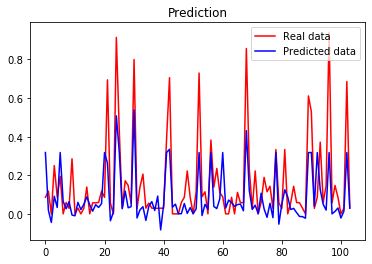

In [9]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.08, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(2400, activation = 'relu', input_dim = 2400))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 1))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

y_pred = model.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()